In [1]:



import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

## Ex 1a

In [2]:
def SIR_model(y : list,t : np.ndarray,beta : float, r : float, reduced: bool  = False) -> list:
    if not reduced:
        S,I,R = y
        dydt = [-beta * S * I,beta * S * I - r * I,r * I]
    else:
        S,I = y
        dydt = [-beta * S * I,beta * S * I - r * I]
    
    return dydt


def solve_SIR_model(y0 : np.ndarray, t : np.ndarray, beta : float, r : float, reduced: bool = False) -> np.ndarray:
    sol = odeint(SIR_model,y0,t,args = (beta,r,reduced))
    return sol


In [9]:
I = 127
S = 1000
R = 0
N = S + I + R
n = 10

betas = np.linspace(0.0008,0.002,n)
R0s = np.linspace(0.6,4.1,n)
rs = betas * N/R0s
y0 = [S,I,R]
T = 15
delta_t = 0.01
t = np.arange(0,T,delta_t)
sols = []

for i in range(n):
    
    sols.append(solve_SIR_model(y0,t,betas[i],rs[i]))


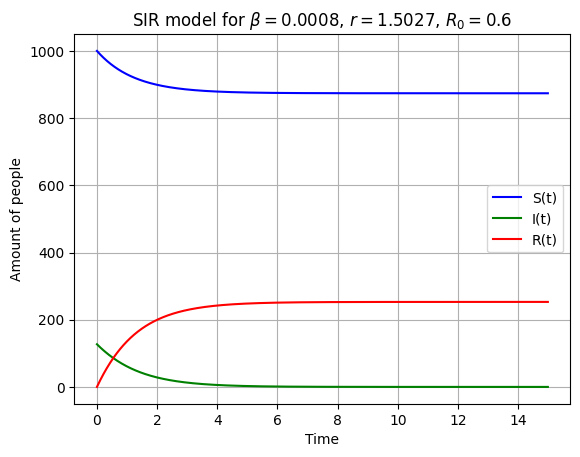

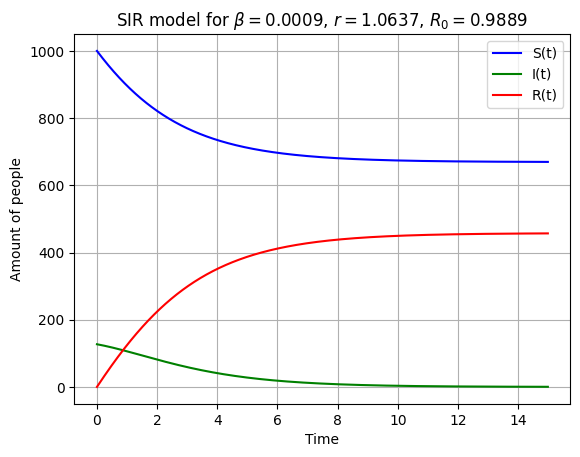

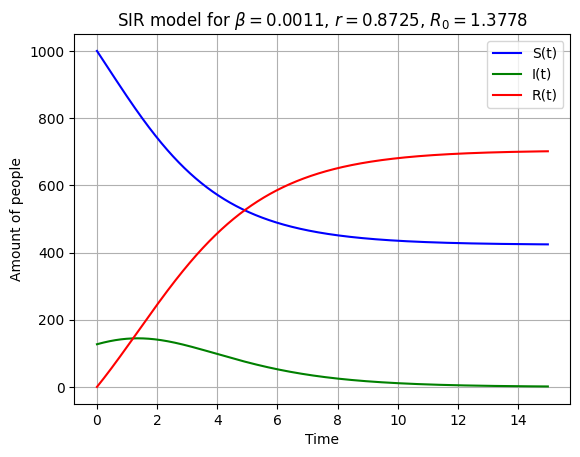

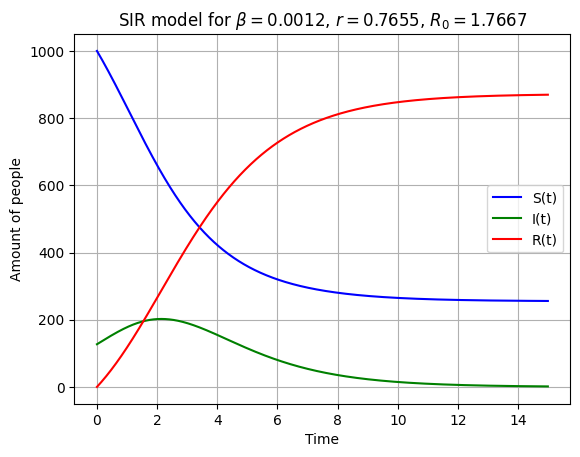

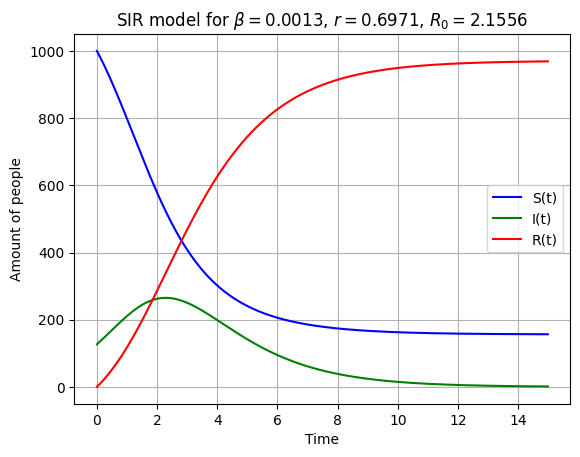

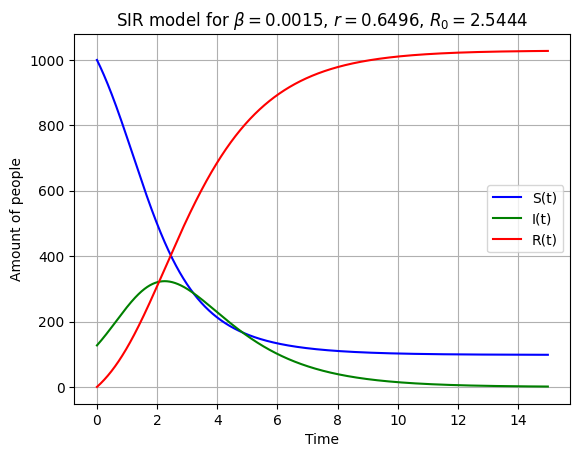

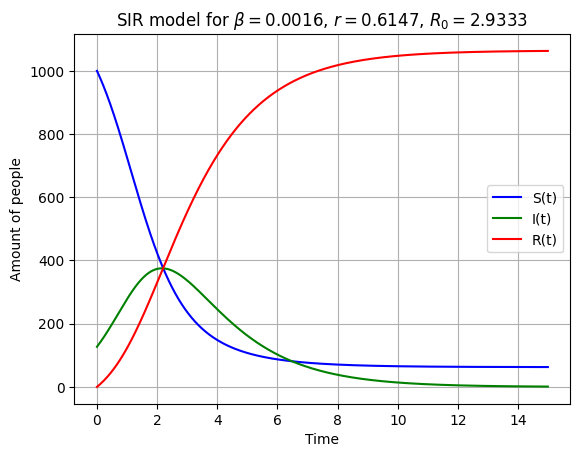

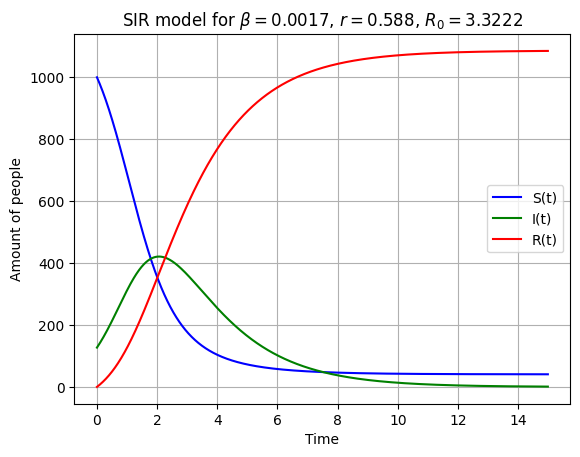

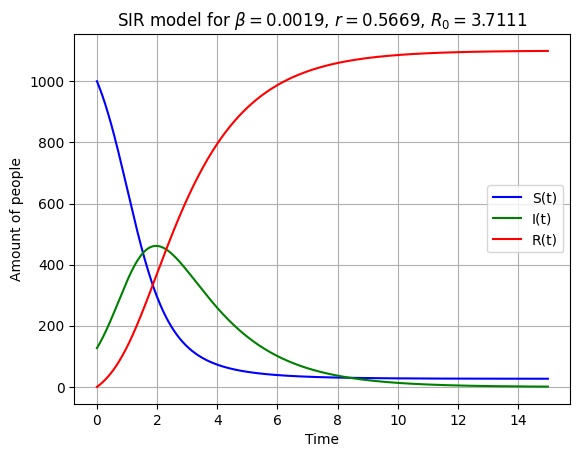

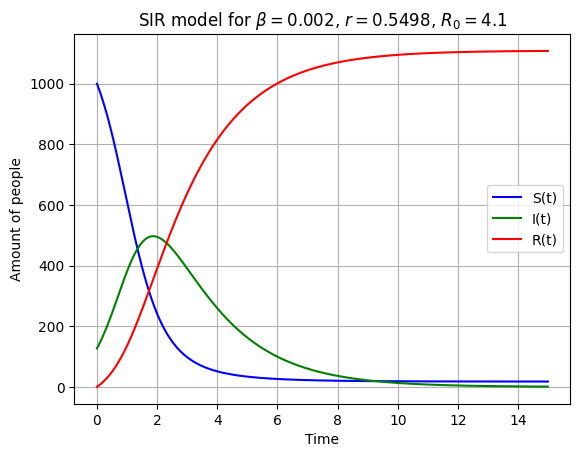

In [10]:
for i in range(n):
    
    plt.title(f'SIR model for $\\beta = {round(betas[i],4)}$, $r = {round(rs[i],4)}$, $R_0 = {round(R0s[i],4)}$')
    plt.xlabel('Time')
    plt.ylabel('Amount of people')
    
    
    plt.plot(t, sols[i][:, 0], 'b', label='S(t)')
    plt.plot(t, sols[i][:, 1], 'g', label='I(t)')
    plt.plot(t, sols[i][:, 2], 'r', label = 'R(t)')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

## Ex 1c

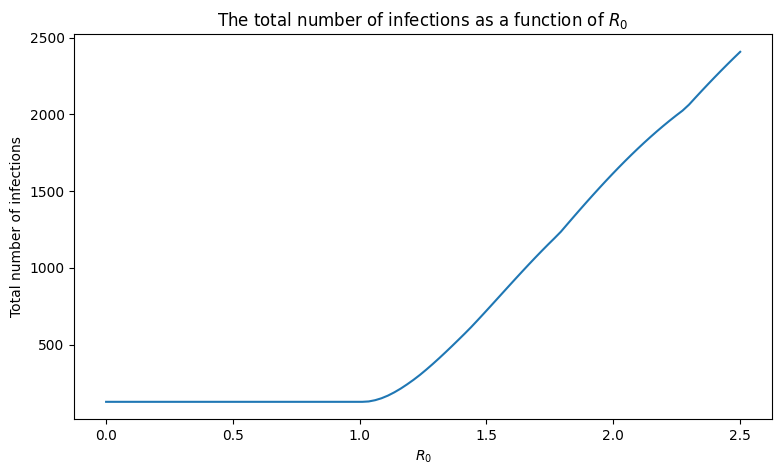

In [11]:
#c
S = 10000
I = 127
R = 0
N = S + I + R
n = 100
R0s = np.linspace(0.001,2.5,n)
betas = np.linspace(0.008,0.015,n)
rs = betas * N/R0s

infected_totals = np.zeros(n)
T = 20
delta_t = 0.01
t = np.arange(0,T,delta_t)

reduced = '-1 '

if reduced:

    y0 = [S,I]
else:
    y0 = [S,I,R]


for i in range(n):
    
    sol = solve_SIR_model(y0,t,betas[i],rs[i],reduced)
    I = sol[:,1]
    infected_totals[i] = np.max(I)
    

plt.figure(figsize = (9,5))
plt.title('The total number of infections as a function of $R_0$')
plt.ylabel('Total number of infections')
plt.xlabel('$R_0$')    
plt.plot(R0s,infected_totals)
plt.show()

## Ex 1b

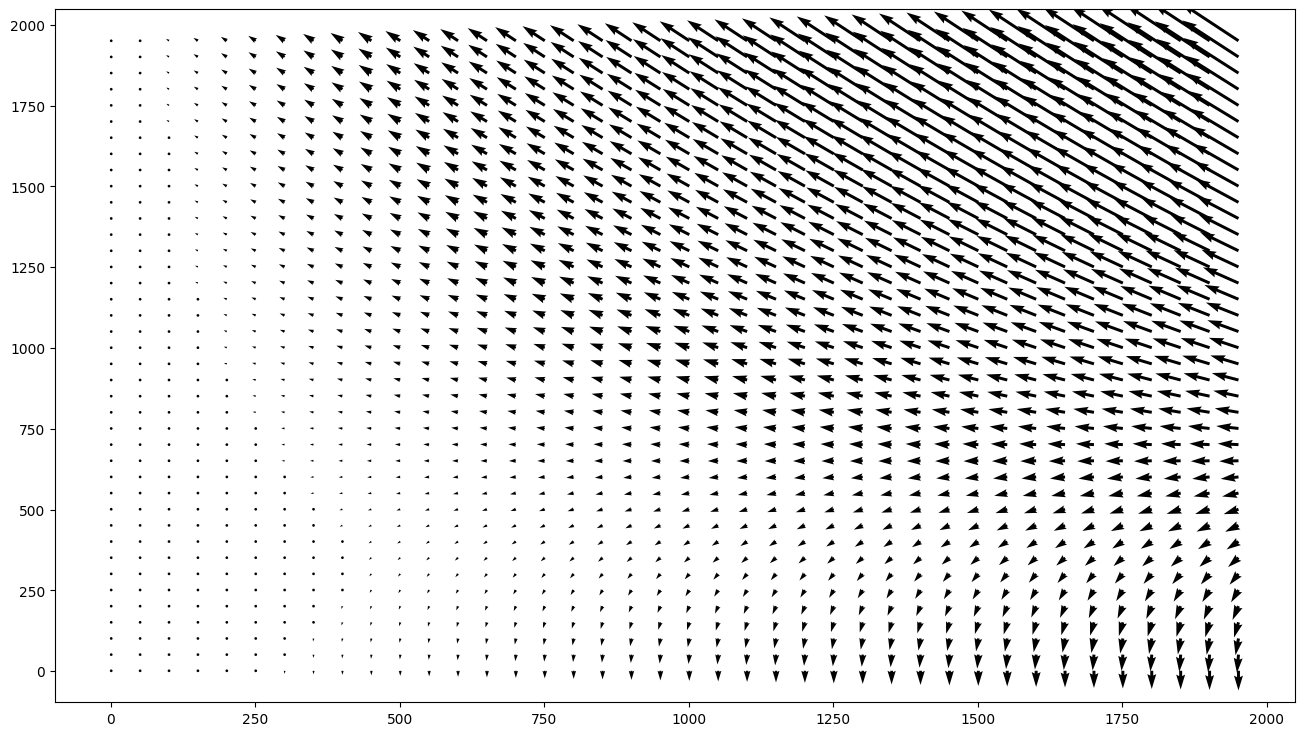

In [12]:
import numpy as np
import matplotlib.pyplot as plt
 
N = 1000
x = np.arange(1,2000,50) 
y = np.arange(1,2000,50)
t = 1
beta = 0.00008
R0 = 1.5
r = beta * N / R0
S,I = np.meshgrid(x,y)    

dS,dI = np.zeros((len(S),len(S))),np.zeros((len(I) , len(I)))

for i in range(len(S)):
    for j in range(len(S)):
        y0 = [x[i],y[j]]
        direction = SIR_model(y0,t,beta,r,True)
       
        dS[i][j] = direction[0]      
        dI[i][j] = direction[1]

plt.figure(figsize = (16,9))
plt.quiver(S, I, dS, dI)
plt.show()

### Ex.2 (a,b)

In [17]:
import networkx as nx
import random as rd

def SIR_network(graph:nx.classes.graph.Graph,p:float,initial_node : any) ->  np.ndarray:
    
    nodes = graph.nodes
    num_nodes = len(nodes)
    #create the dictionary that tells about state of each node in the network
    #S - suspectible , I - infected , R - recovered
    status = {node : "S" for node in nodes}
    status[initial_node] = 'I'
    infected_nodes = [initial_node]
    infected_fraction = np.zeros(num_nodes)
    
    time_step = 0
    infected_number = 1
    infected_fraction[0] = infected_number/num_nodes
    
    while infected_number > 0:
        time_step += 1
        #create temporary list where will appends the infected nodes
        newly_infected = []
        for node in infected_nodes:
            neighbors = list(graph.neighbors(node))
            for neighbor in neighbors:
                if status[neighbor] == 'S' and rd.random() < p:
                    status[neighbor] = 'I'
                    newly_infected.append(neighbor)
            #set node to recovered
            status[node] = 'R'
            #set node to infected
            infected_nodes = newly_infected
            #change the number of infected
            infected_number = len(infected_nodes)
            #add the infected fraction in this time
            infected_fraction[time_step] = infected_number/num_nodes
            
    return infected_fraction

def infected_fraction_MCsim(graph:nx.classes.graph.Graph,p : float,initial_node :any,iter_number : n) -> np.ndarray:
    
    res = np.zeros(len(graph.nodes))
    for i in range(iter_number):
        res += SIR_network(graph,p,initial_node)
    
    return res/iter_number


## Lattice 2d graph - infected fraction

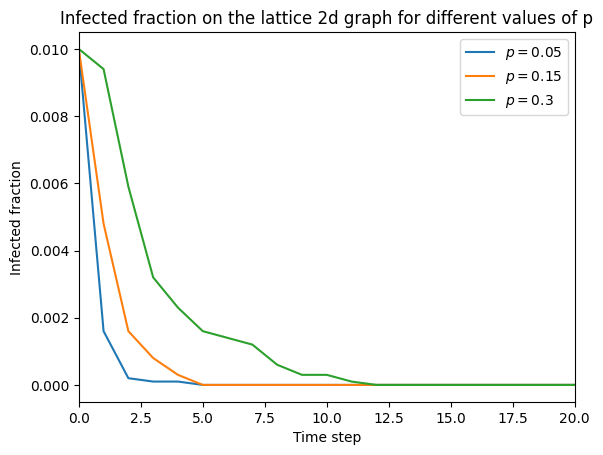

In [27]:
num_nodes = 100
lattice_graph = nx.grid_2d_graph(int(np.sqrt(num_nodes)),int(np.sqrt(num_nodes)))
probs = [0.05,0.15,0.3]
iter_number = 100
initial_node = rd.choice(list(lattice_graph.nodes))
time = np.arange(iter_number)
for p in probs:
    infected_fraction = infected_fraction_MCsim(lattice_graph,p,initial_node,iter_number)
    plt.title('Infected fraction on the lattice 2d graph for different values of p')
    plt.xlabel('Time step')
    plt.ylabel('Infected fraction')
    plt.xlim((0,20))
    plt.plot(time,infected_fraction,label = f'$p = {p}$')
    plt.legend()
plt.show() 

## Random graph - infected fraction

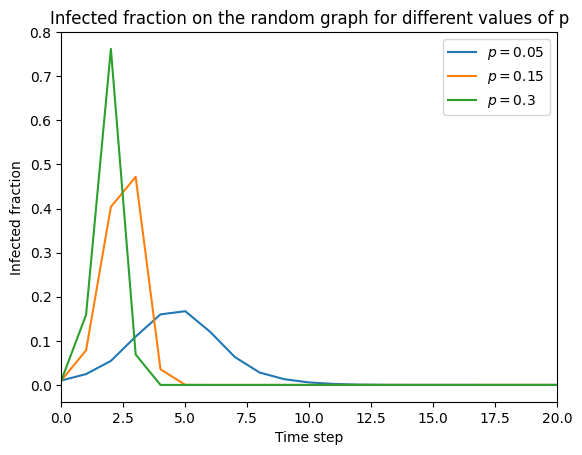

In [26]:
probs = [0.05,0.15,0.3]
iter_number = 100
p = 0.5
random_graph = nx.gnp_random_graph(100, p)
initial_node = rd.choice(list(random_graph.nodes))
time = np.arange(iter_number)
for p in probs:
    infected_fraction = infected_fraction_MCsim(random_graph,p,initial_node,iter_number)
    plt.title('Infected fraction on the random graph for different values of p')
    plt.xlabel('Time step')
    plt.ylabel('Infected fraction')
    plt.xlim((0,20))
    plt.plot(time,infected_fraction,label = f'$p = {p}$')
    plt.legend()
plt.show()    

## Watts - Strogatz graph - infected fraction

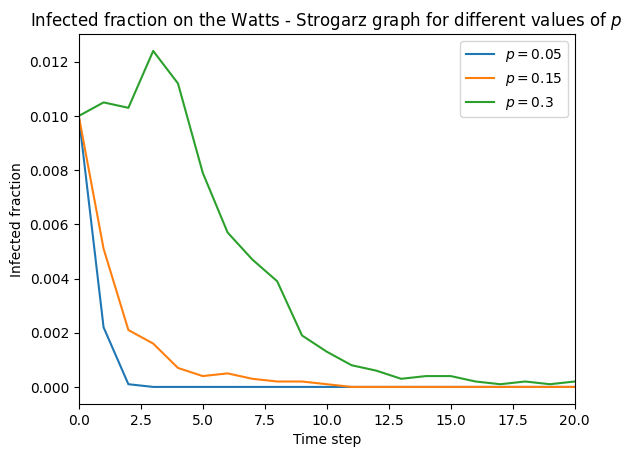

In [24]:
nodes_number = 100
k = 5
p = 0.6
watts_graph = nx.watts_strogatz_graph(nodes_number,k,p)
initial_node = rd.choice(list(watts_graph.nodes))
time = np.arange(iter_number)
for p in probs:
    infected_fraction = infected_fraction_MCsim(watts_graph,p,initial_node,iter_number)
    plt.title('Infected fraction on the Watts - Strogarz graph for different values of $p$')
    plt.xlabel('Time step')
    plt.ylabel('Infected fraction')
    plt.xlim((0,20))
    plt.plot(time,infected_fraction,label = f'$p = {p}$')
    plt.legend()
plt.show() 

## Barabasi - Albert graph - infected fraction

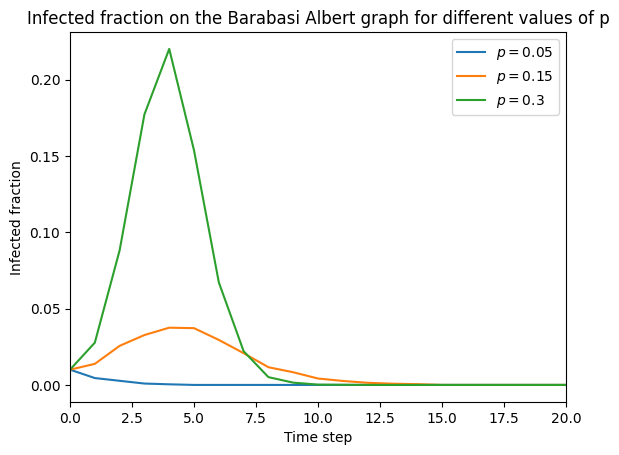

In [25]:
nodes_number = 100
m = 4
barabasi_graph = nx.barabasi_albert_graph(nodes_number,m)
initial_node = rd.choice(list(barabasi_graph.nodes))
time = np.arange(iter_number)
for p in probs:
    infected_fraction = infected_fraction_MCsim(barabasi_graph,p,initial_node,iter_number)
    plt.title('Infected fraction on the Barabasi Albert graph for different values of p')
    plt.xlabel('Time step')
    plt.ylabel('Infected fraction')
    plt.xlim((0,20))
    plt.plot(time,infected_fraction,label = f'$p = {p}$')
    plt.legend()
plt.show() 

## Ex 2d

In [29]:
#d 
#the total propotion of the network that becomes infected, the time to clear infection , 
#the time to the largest number of infection

def measure_calculation(infected_fraction : np.ndarray) -> tuple:
    max_infected = np.max(infected_fraction)
    infected_list = list(infected_fraction)
    total_propotion = np.sum(infected_fraction)
    time_clear = len(infected_fraction) - np.sum(infected_fraction == 0)
    time_largest = infected_list.index(max_infected)
    
    return total_propotion,time_clear,time_largest

def measure_calculation_MCsim(graph:nx.classes.graph.Graph, probs: np.ndarray, initial_node : any, iter_number : int) -> tuple:
    n = len(probs)
    total_propotion = np.zeros(n)
    time_clear = np.zeros(n)
    time_largest = np.zeros(n)
    for i in range(n):
        for j in range(iter_number):
            infected_fraction = SIR_network(graph,probs[i],initial_node)
            tp,tc,tl = measure_calculation(infected_fraction)
            total_propotion[i] += tp/iter_number
            time_clear[i] += tc/iter_number
            time_largest[i] += tl/iter_number
            
    return total_propotion,time_clear,time_largest


## Results for lattice 2d graph

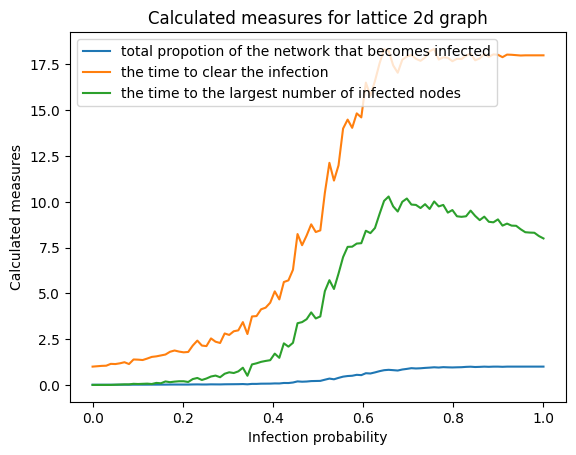

In [30]:
probs = np.linspace(0,1,100)
iter_number = 100
inital_node = rd.choice(list(lattice_graph.nodes))
total_propotion,time_clear,time_largest = measure_calculation_MCsim(lattice_graph,probs,initial_node,iter_number)

plt.title("Calculated measures for lattice 2d graph")
plt.plot(probs,total_propotion, label = 'total propotion of the network that becomes infected')
plt.plot(probs,time_clear, label = 'the time to clear the infection')
plt.plot(probs,time_largest,label = 'the time to the largest number of infected nodes')
plt.xlabel('Infection probability')
plt.ylabel('Calculated measures')
plt.legend()
plt.show()

## Results for random graph

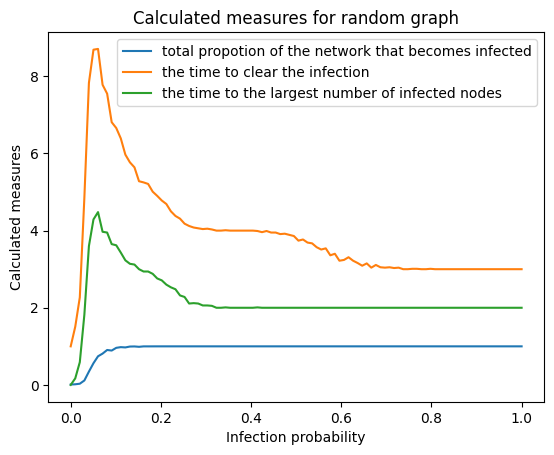

In [35]:
random_graph = nx.gnp_random_graph(100, 0.4)
initial_node = rd.choice(list(random_graph.nodes))
total_propotion,time_clear,time_largest = measure_calculation_MCsim(random_graph,probs,initial_node,iter_number)

plt.title("Calculated measures for random graph")
plt.plot(probs,total_propotion, label = 'total propotion of the network that becomes infected')
plt.plot(probs,time_clear, label = 'the time to clear the infection')
plt.plot(probs,time_largest,label = 'the time to the largest number of infected nodes')
plt.xlabel('Infection probability')
plt.ylabel('Calculated measures')
plt.legend()
plt.show()

## Results for Watts - Strogatz graph

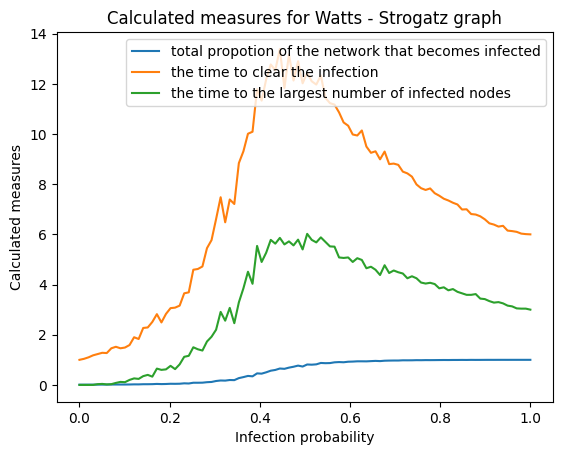

In [36]:
initial_node = rd.choice(list(watts_graph.nodes))
total_propotion,time_clear,time_largest = measure_calculation_MCsim(watts_graph,probs,initial_node,iter_number)

plt.title("Calculated measures for Watts - Strogatz graph")
plt.plot(probs,total_propotion, label = 'total propotion of the network that becomes infected')
plt.plot(probs,time_clear, label = 'the time to clear the infection')
plt.plot(probs,time_largest,label = 'the time to the largest number of infected nodes')
plt.xlabel('Infection probability')
plt.ylabel('Calculated measures')
plt.legend()
plt.show()

## Results for the Barabasi - Albert graph

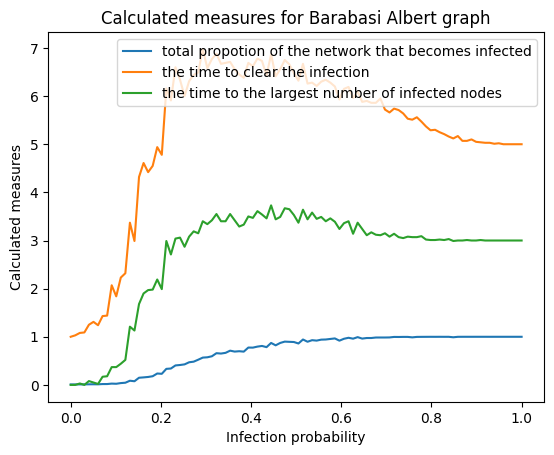

In [37]:
initial_node = rd.choice(list(barabasi_graph.nodes))
total_propotion,time_clear,time_largest = measure_calculation_MCsim(barabasi_graph,probs,initial_node,iter_number)

plt.title("Calculated measures for Barabasi Albert graph")
plt.plot(probs,total_propotion, label = 'total propotion of the network that becomes infected')
plt.plot(probs,time_clear, label = 'the time to clear the infection')
plt.plot(probs,time_largest,label = 'the time to the largest number of infected nodes')
plt.xlabel('Infection probability')
plt.ylabel('Calculated measures')
plt.legend()
plt.show()